['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442, 10)
(442,)
feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
151.0
y: [0.43641618 0.21676301 0.40751445 0.59537572 0.39017341 0.28034682
 0.39884393 0.18208092 0.31791908 0.89595376 0.29190751 0.19942197
 0.51734104 0.53468208 0.34104046 0.49421965 0.47976879 0.41618497
 0.28034682 0.48554913 0.19653179 0.1416185  0.19653179 0.70809249
 0.53179191 0.58381503 0.39595376 0.24566474 0.37861272 0.81791908
 0.37283237 0.17052023 0.98554913 0.25144509 0.18786127 0.29479769
 0.76589595 0.79768786 0.7283237  0.26011561 0.28901734 0.15895954
 0.17630058 0.26589595 0.74855491 0.15317919 0.54913295 0.41040462
 0.21676301 0.41040462 0.44797688 0.65028902 0.17052023 0.30057803
 0.52601156 0.3699422  0.15028

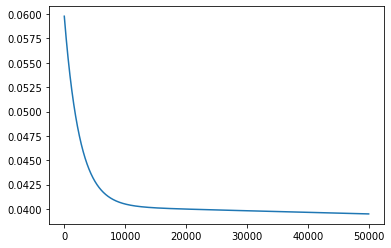

Predictions : [0.56283551 0.44472487 0.58465206 0.75477119 0.53649617 0.47875823
 0.70419296 0.68949599 0.26896144 0.48356723 0.34469414 0.20489357
 0.13440228 0.65361281 0.39862179 0.37791931 0.67481195 0.7771208
 0.39579837 0.68425129 0.32178691 0.360818   0.2817463  0.6062296
 0.34453891 0.53859004 0.57234953 0.52049644 0.15986546 0.51758154
 0.48473645 0.27901789 0.42055875 0.54381526 0.52597413 0.62314362
 0.42833873 0.50146353 0.59922034 0.2475335  0.33757978 0.53081639
 0.41151089 0.57298969 0.44425392 0.31084172 0.17877559 0.2872354
 0.20096313 0.29596207 0.26703577 0.13153596 0.49872507 0.33743331
 0.66415871 0.35259396 0.36660912 0.51480662 0.27268908 0.17658038
 0.54887798 0.33859316 0.39404719 0.52958817 0.29702657 0.54363787
 0.60434538 0.51405512 0.10363622 0.37921333 0.41003844 0.6688504
 0.66942091 0.36370984 0.27012567 0.57827812 0.70485174 0.42421663
 0.59876321 0.44889622 0.30650365 0.19935352 0.15890056 0.33724543
 0.31663362 0.27788055 0.10296307 0.15506104 0.31119

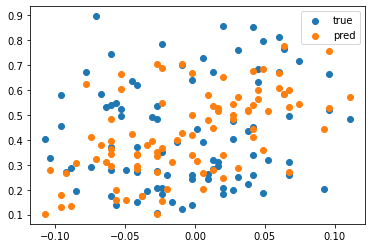

In [2]:
# (1) 데이터 가져오기
from sklearn.datasets import load_diabetes
import numpy as np

diabetes = load_diabetes()

diabetes
print(diabetes.feature_names)

df_X = diabetes.data
df_y = diabetes.target

print(df_X.shape)
print(df_y.shape)

for i, feature_name in enumerate(diabetes.feature_names):
    print(f'feature {i+1} : {feature_name}')

    
# (2, 3) 입력 데이타, 예측 데이타를 numpy array로 저장
X = np.array(df_X)
y = np.array(df_y) / 346
#print(X)
#print(y)

print(df_X[0])
print(df_y[0])
print("y:", y)


# (4) train 데이터와 test 데이터로 분리하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train :", X_train.shape)
print("X_test : ", X_test.shape)

# (5) 모델 준비하기 
# y = w1*x1 + w2*x2+ ....w10*x10 + b
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

# (6) 손실한수 loss 정의하기 (MSE)
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

# (7) 기울기를 구하는 gradient 함수 구현하기
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

# (8) 하이퍼 파라미터인 학습률 설정하기
LEARNING_RATE = 0.0001
#LEARNING_RATE = 1

# (9) 모델 학습하기

# random한 W(w1 ~ w10), b 생성하기
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

print("===================")
print( "Initial W is", W)
print( "Initial b is", b)
print("===================")

losses = []
for i in range(1, 50000):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 5000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

print("===================")
print( "Trained W is", W)
print( "Trained b is", b)
print("===================")

import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

# (10) test 데이타에 대한 성능 확인하기
y_preditions = model(X_test, W, b)
print("Predictions :", y_preditions)
loss = loss(X_test, W, b, y_test)
print("Loss :", loss)


from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preditions)
mse
print("mse_sklearn", mse)

# (11) 정답 데이터와 예측한 데이터 시각화하기
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], y_preditions, label="pred")
plt.legend()
plt.show()